In [1]:
#BASCO, ISAIAH JESS l. NEURAL NETWORK
#CONCLUSION To restrict down to a few models that we may analyze, we must first determine the type of problem and the solution requirements. Our issue is one of categorization and regression. We wish to determine the link between output (survival or failure) and other factors or attributes (Gender, Age, Port...). We are also performing supervised learning, which is a type of machine learning in which we train our model using a supplied dataset.

In [2]:
#IMPORT LIBRARIES TO RUN THE PROGRAM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv('titanic3.csv')

In [4]:
dt.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
dt.shape

(1310, 14)

In [6]:
dt.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [8]:
dt.isna().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [9]:
dt = dt.drop(columns=['name','cabin','boat','body','home.dest','ticket'])
dt = dt.dropna(subset=['age','embarked','fare'])
dt.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [10]:
dt['sex'].unique()

array(['female', 'male'], dtype=object)

In [11]:
dt['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [12]:
dt['survived'].unique()

array([1., 0.])

In [13]:
sex = {
    'female': 1,
    'male': 0
}

embarked = {
    'C': 1,
    'S': 2,
    'Q': 3
}

In [14]:
dt['sex'].replace(sex, inplace=True)
dt['embarked'].replace(embarked, inplace=True)

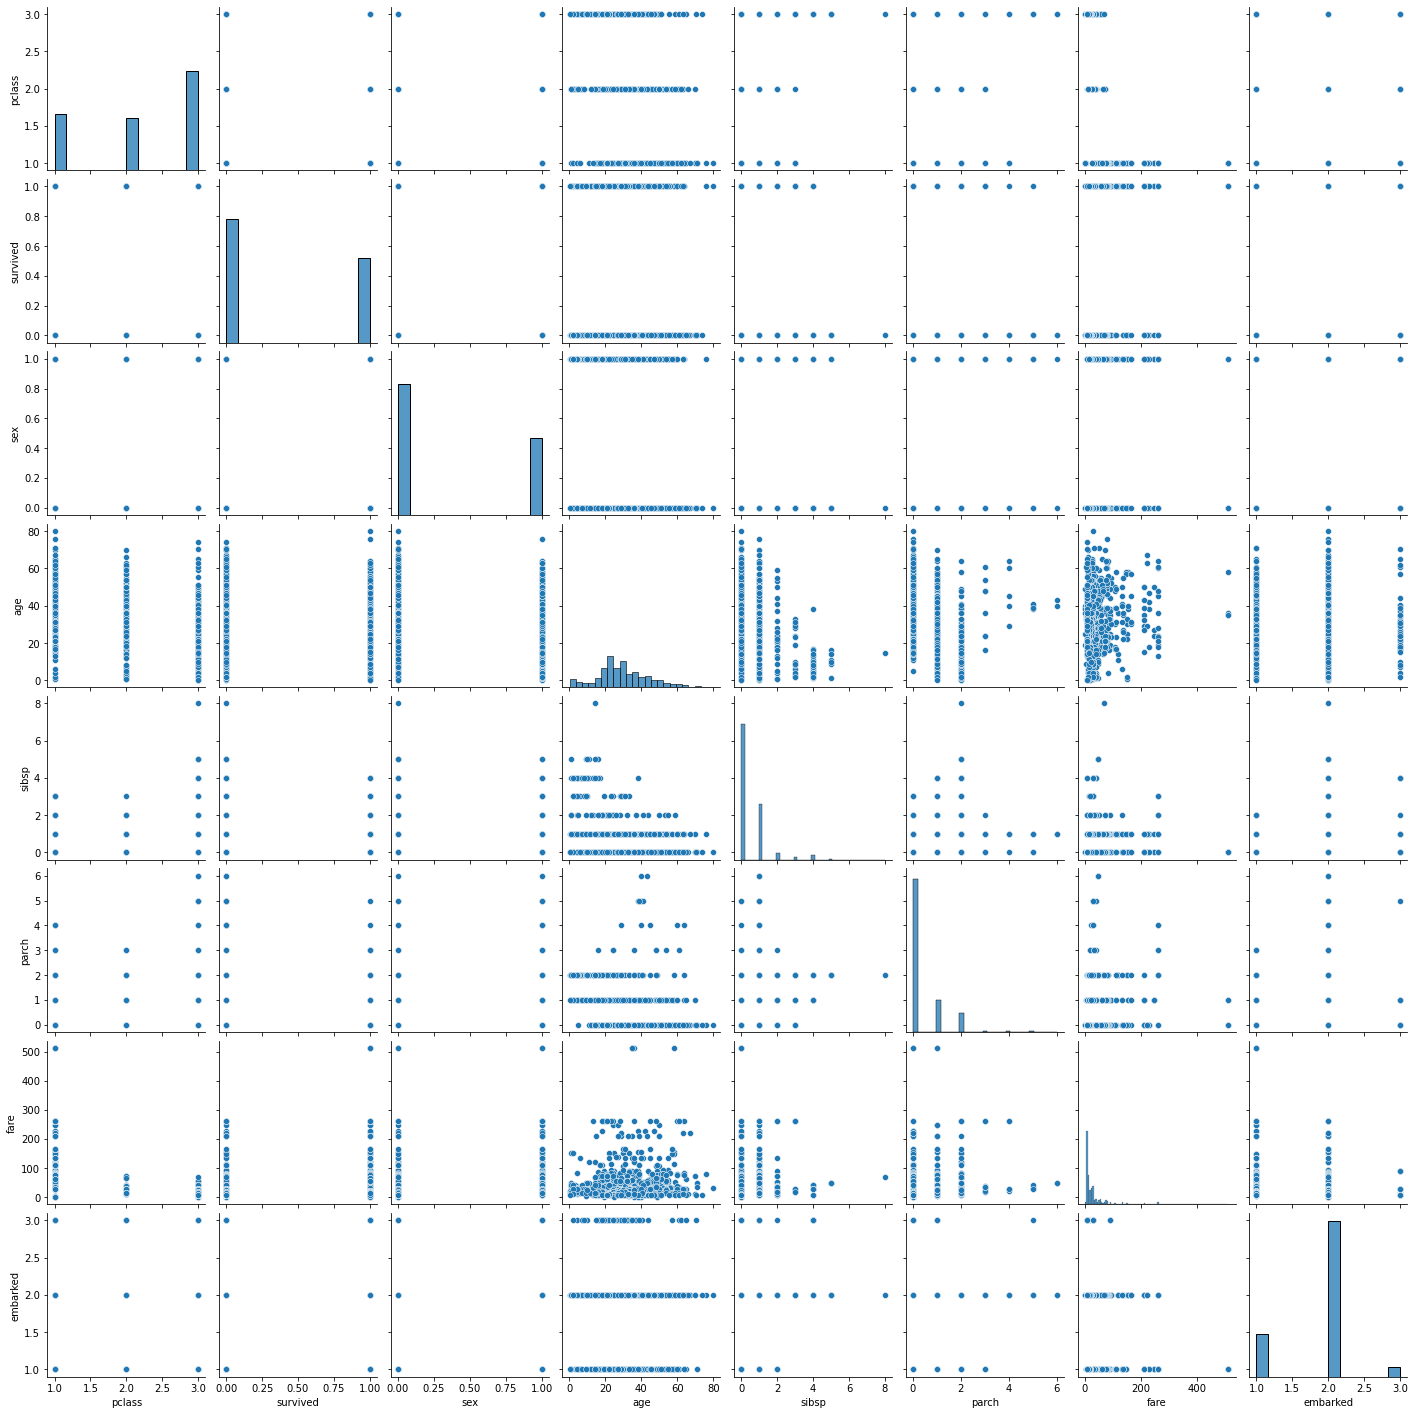

In [15]:
sns.pairplot(dt)

In [16]:
x = dt.iloc[:,1:]
y = dt['survived']

In [17]:
x.head()

,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,29.0000,0.0,0.0,211.3375,2
1,1.0,0,0.9167,1.0,2.0,151.5500,2
2,0.0,1,2.0000,1.0,2.0,151.5500,2
3,0.0,0,30.0000,1.0,2.0,151.5500,2
4,0.0,1,25.0000,1.0,2.0,151.5500,2


In [18]:
y

0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
1301    0.0
1304    0.0
1306    0.0
1307    0.0
1308    0.0
Name: survived, Length: 1043, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=111)

In [20]:
x_train

,survived,sex,age,sibsp,parch,fare,embarked
457,0.0,0,33.0,0.0,0.0,12.2750,2
114,0.0,0,19.0,3.0,2.0,263.0000,2
720,0.0,0,24.0,0.0,0.0,7.2500,3
571,0.0,0,23.0,0.0,0.0,13.0000,2
167,1.0,1,35.0,1.0,0.0,90.0000,2
...,...,...,...,...,...,...,...
133,1.0,0,49.0,1.0,0.0,89.1042,1
744,0.0,0,19.0,0.0,0.0,10.1708,2
95,1.0,1,54.0,1.0,1.0,81.8583,2
793,0.0,0,47.0,0.0,0.0,7.2500,2


In [21]:
lm = LogisticRegression()

In [22]:
lm.fit(x_train, y_train)

C:\Users\Isaiah Jess\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)
y_pred = lm.predict(x_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [25]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [27]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[179   0]
 [  0 134]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       179
         1.0       1.00      1.00      1.00       134

    accuracy                           1.00       313
   macro avg       1.00      1.00      1.00       313
weighted avg       1.00      1.00      1.00       313

Accuracy: 1.0


In [28]:
import tensorflow.compat.v2 as tf
from tensorflow.python.platform import tf_logging as logging
from keras import Sequential
from keras import Dense

ImportError: cannot import name 'Dense' from 'keras' (C:\Users\Isaiah Jess\anaconda3\lib\site-packages\keras\__init__.py)

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=150, batch_size=10)

In [ ]:
model.fit(x_variables, y_variable, epochs=2, batch_size=25)

In [ ]:
_, accuracy = model.evaluate(x_variables, y_variable)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
model.summary()